IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

LOADING DATA

In [2]:
raw_data = pd.read_csv('C:/Users/ronin/Google Drive/IAS ML MODEL/p2/BIG DATA/big_dat.csv')
# print(raw_data.info())

In [3]:
raw_data.columns =['REF'] + [''] * (len(raw_data.columns)-1) #making REF column of refractive index which is our LABEL

raw_data.head()

,REF,,,,,,,,,,...,,,,,,,,,,
0,1.3008,0.005880,0.005925,0.005982,0.006050,0.006133,0.006233,0.006352,0.006493,0.006653,...,0.006480,0.006284,0.006100,0.005927,0.005764,0.005609,0.005461,0.005321,0.005187,0.005059
1,1.3012,0.005875,0.005920,0.005975,0.006042,0.006124,0.006222,0.006340,0.006480,0.006640,...,0.006483,0.006287,0.006103,0.005930,0.005767,0.005611,0.005464,0.005324,0.005190,0.005062
2,1.3016,0.005870,0.005914,0.005968,0.006035,0.006115,0.006212,0.006328,0.006466,0.006627,...,0.006486,0.006290,0.006106,0.005933,0.005770,0.005614,0.005467,0.005327,0.005193,0.005065
3,1.3020,0.005865,0.005908,0.005962,0.006027,0.006106,0.006201,0.006316,0.006453,0.006613,...,0.006489,0.006293,0.006110,0.005936,0.005772,0.005617,0.005470,0.005329,0.005195,0.005067
4,1.3024,0.005860,0.005903,0.005955,0.006020,0.006097,0.006191,0.006304,0.006439,0.006598,...,0.006492,0.006297,0.006113,0.005939,0.005775,0.005620,0.005473,0.005332,0.005198,0.005070


PLOTTING A ROW

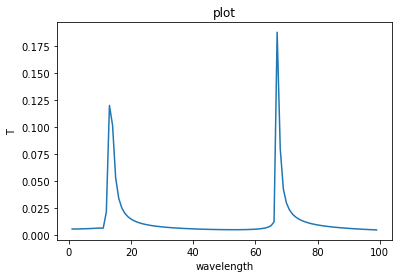

In [4]:
# r2 = raw_data.iloc[:,1:]
x = list(range(1, 100))
y = raw_data.iloc[1,1:]
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('wavelength')
# naming the y axis
plt.ylabel('T')
  
# giving a title to my graph
plt.title('plot')
  
# function to show the plot
plt.show()

In [5]:
y = raw_data['REF'] #Y is our label vector
raw_data.drop(['REF'], axis=1, inplace=True)
print(y)

0      1.3008
1      1.3012
2      1.3016
3      1.3020
4      1.3024
        ...  
494    1.4984
495    1.4988
496    1.4992
497    1.4996
498    1.5000
Name: REF, Length: 499, dtype: float64


SPLITTING TO TRAIN AND TEST DATA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size=0.2, random_state=42)

APPLYING RANDOM FOREST REGRESSION MODEL

In [25]:
regr = RandomForestRegressor(n_estimators=3, max_depth=4, max_leaf_nodes=10, min_samples_leaf=1, random_state=4200)
m1 = regr.fit(X_train,y_train)
m1.score(X_train,y_train)

0.9929593370081103

MAKE PREDICTIONS FROM TEST SET

In [26]:
y_pred = (m1.predict(X_test))

CALCULATE RMS ERROR

In [27]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=True)
print(rms)

3.1499552330297355e-05


PREDICTATED VALUES

In [28]:
y_pred

array([1.48760901, 1.33481868, 1.39351248, 1.36724919, 1.39351248,
       1.46438778, 1.36724919, 1.31861102, 1.43913031, 1.30954123,
       1.34219202, 1.41397576, 1.43913031, 1.37920589, 1.34219202,
       1.46438778, 1.48760901, 1.30954123, 1.36286779, 1.48760901,
       1.41397576, 1.41397576, 1.48760901, 1.33481868, 1.31861102,
       1.34219202, 1.44665385, 1.48760901, 1.34219202, 1.32551936,
       1.48760901, 1.34219202, 1.36286779, 1.30954123, 1.43913031,
       1.34219202, 1.38471678, 1.36724919, 1.48128809, 1.41397576,
       1.38471678, 1.48760901, 1.31362328, 1.43007294, 1.30954123,
       1.30954123, 1.43913031, 1.36724919, 1.34219202, 1.43913031,
       1.41397576, 1.48760901, 1.45993137, 1.34219202, 1.30954123,
       1.43913031, 1.46438778, 1.48760901, 1.4736762 , 1.38885858,
       1.46438778, 1.31861102, 1.48760901, 1.38471678, 1.41397576,
       1.36286779, 1.43913031, 1.33481868, 1.48760901, 1.39989978,
       1.48760901, 1.36286779, 1.34219202, 1.33481868, 1.48760

In [29]:

y_test

460    1.4848
73     1.3300
231    1.3932
175    1.3708
237    1.3956
        ...  
247    1.3996
384    1.4544
19     1.3084
321    1.4292
331    1.4332
Name: REF, Length: 100, dtype: float64

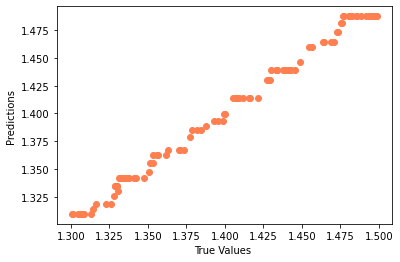

In [30]:
plt.scatter(y_test,y_pred, c='coral')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
# plt.axis('equal')
# plt.axis('square')
plt.show()


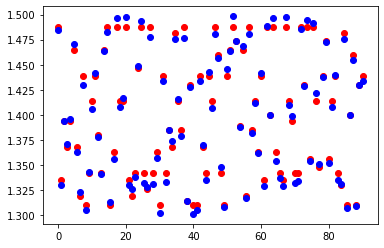

In [31]:
x = np.linspace(0,90,y_test.shape[0])
plt.scatter(x, y_pred, color ='red') # red shows predicted
plt.scatter(x, y_test, color ='blue')  #blue is actual
plt.show()
# hence perfect overlap shows good prediction